In [1]:
import json
import xmltodict
import numpy as np

In [2]:
import os
os.chdir("C:/Users/ray/NER")

In [3]:
pwd

'C:\\Users\\ray\\NER'

#### Function to import XML & Convert to Dictionary/JSON

In [4]:
def convert(xml_file, xml_attribs=True):
    with open(xml_file, "rb") as f:    # notice the "rb" mode
        d = xmltodict.parse(f, xml_attribs=xml_attribs)
    with open('data.json', 'w') as outfile:
        return json.dump(d,outfile, indent=4, sort_keys=True)

#### Creating Raw Text Data for Pretrain

In [5]:
raw = [] ## Empty list to store raw data

In [6]:
raw_list = [3,5,7,10,11,12,14,17,18,29,34,37,38,39,44,48,52,53,54,58,63,66,67,72,73,82,83,88,92,94,96,99,100,101,105,110,111,115,117,118,119,122,123,124,125,129,131,136,139,140,141,144,146,149,152,153,156,157,158,162,165,167,168,169,171,172,173,174,176,177,178,179,183,185,187,190,191,192,193,197,200,201,202,203,204,205,206,207,208,210,211,213,216,218,219,221,222,227,229,230,231,232,234,235,236,238,239,240,241,243,247,248,250,251,252,257,261,268,269,272,273,275,279,283,286,288,289,294,296,297,300,305,306,309,313,314,315,317,322,326,333,339,344,349,350,351,357,362,363,366,367,368,371,372,375,378,380,383,384,385,386,387,388,389,392,393,397,399,402,403,404,405,406,408,409,412,414,418,419,420,424,426,428,429,431,432,434,435,438,439,440,442,443,445,447,449,451,453,454,455,456,458,460,461,472,474,476,480,481,485,488,491,492,495,501,503,510,511,512,513,515,517,520,526,527,531,532,535,538,539,542,544,545,548,555,566,571,572,573,575,579,581,582,586,587,589,591,593,594,597,598,599,602,603,604,606,609,612,615,618,620,623,626,628,629,635,638,640,642,643,646,647,649,650,652,653,654,655,656,658,661,662,663,668,687,688,690,692,694,700,707,714,717,720,727,732,735,748,749,751,752,757,759,761,762,764,773,774,775,777,781,786,789,790,803,804,806,808,812,818,819,830,832,834,835,836,839,840,842,844,845,853,864,875,886,887,894,896,899,906,908,917,925,938,950,961,962,965,970,972,979,990,994,995,1014,1017,1018,1020,1022,1025,1032,1035,1036,1040,1048,1056,1058,1062,1083,1088,1091,1099,1107,1113,1116,1125,1137,1139,1141,1151,1163,1170,1174,1188,1192,1195,1196,1199,1204,1206,1215,1218,1221,1224,1225,1227,1228,1230,1231,1241,1247] # List of raw text files

In [7]:
for x in raw_list:
    convert("Raw"+str(x)+".xml")
    with open('data.json') as f:
            data = json.load(f) ## load newly created json file
            text = data['GateDocument']['TextWithNodes'] ## select only text portion
            dictn = {} ## Create empty dictionary
            dictn['text']=text
    raw.append(dictn)

In [8]:
#raw

#### Convert raw text to spaCy JSONL format

In [9]:
import srsly

In [10]:
srsly.write_jsonl("C:/Users/ray/NER/raw.jsonl",raw)

Use Command Prompt to Run: python -m spacy pretrain ./raw.jsonl en_vectors_web_lg ./pretrained_model2000 -i 2000

The above command runs for 2000 iterations and returns pretrained tok2vec model.

Takes around 1 day to complete on 64 bit OS & 8GB RAM.

#### Creating Train & Test Data

In [11]:
train_data = [] ## Empty list to store train data
test_data = [] ## Empty list to store test data

In [12]:
xml_list = [1,2,4,6,13,15,16,19,20,21,22,23,24,26,27,30,35,36,46,49,50,51,55,56,59,61,62,64,68,69,70,71,74,75,76,77,78,79,81,84,85,86,89,91,93,95,97,98,104,106,107,108,109,113,114,120,121,126,127,130,133,134,135,138,145,147,150,151,154,155,159,161,163,164,166,170,180,184,186,188,189,194,196,199,214,215,220,223,224,225,226,228,237,242,244,246,249,254,255,262,263,267,270,277,281,284,287,290,291,292,293,299,301,303,307,311,316,318,319,320,325,328,329,330,332,334,335,336,338,342,343,345,346,352,354,356,358,359,360,364,369,376,377,379,381,390,391,394,396,398,400,407,410,411,413,415,416,417,422,423,425,427,430,436,437,441,444,446,448,450,457,464,465,467,469,473,475,477,478,484,486,489,493,494,496,497,498,499,502,504,505,506,507,508,516,518,519,522,524,529,530,533,536,537,546,549,550,651,657,659,660,664,665,666,667,669,670,671,672,673,674,680,682,683,686,691,695,698,701,702,703,704,705,706,708,709,712,713,715,716,718,719,722,723,724,725,726,728,729,730,731,733,734,736,737,738,739,740,741,742,744,745,746,747,750,851,852,854,855,856,857,858,860,861,862,863,865,866,867,868,871,874,876,878,879,880,881,882,883,889,890,891,892,895,898,900,902,903,904,905,909,910,911,912,913,914,915,916,918,920,921,923,924,926,927,928,930,931,932,933,934,935,937,940,941,942,943,944,945,946,947,948,949,951,952,953,954,955,956,957,958,959,960,963,964,966,967,968,969,973,974,975,976,978,980,981,982,983,984,985,986,987,988,989,991,992,993,996,997,998,999,1000,1001,1002,1003,1004,1006,1007,1009,1010,1011,1012,1013,1016,1019,1021,1023,1024,1026,1027,1028,1029,1033,1037,1038,1039,1041,1042,1043,1044,1045,1046,1047,1049,1050,1051,1052,1053,1054,1055,1057,1060,1061,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1078,1080,1081,1084,1085,1090,1092,1095,1096,1097,1100,1101,1105,1106,1108,1109,1110,1112,1114,1120,1121,1122,1123,1127,1128,1129,1130,1131,1132,1134,1135,1136,1144,1145,1146,1147,1148,1149,1150,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1164,1165,1166,1167,1168,1169,1171,1172,1173,1175,1176,1177,1178,1179,1181,1183,1184,1185,1186,1187,1189,1190,1191,1193,1194,1197,1198,1200,1201,1202,1203,1205,1209,1210,1211,1212,1213,1214,1216,1219,1220,1222,1223,1226,1229,1232,1233,1234,1235,1236,1237,1238,1239,1240,1242,1243,1244,1245,1246,1248,1249] # List of training documents

In [13]:
from sklearn.model_selection import train_test_split

x_train ,x_test = train_test_split(xml_list,test_size=0.2)

In [14]:
len(x_train)

426

In [15]:
len(x_test)

107

In [16]:
for x in x_train:
    convert("Doc"+str(x)+".xml") # convert xml file to json format
    with open('data.json') as f:
        data = json.load(f) ## load newly created json file
        text = data['GateDocument']['TextWithNodes']['#text'] ## select only text portion
        listofDicts = data['GateDocument']['AnnotationSet']['Annotation'] ## select only annotation portion
        annot = [] ## Create empty list
        entity = {} ## Create empty dictionary
        for x in listofDicts:
            e = int(x['@EndNode'])
            s = int(x['@StartNode'])
            t = x['@Type']
            val = (s,e,t)
            annot.append(val) ## Populate list for each annotation set & re - arrange values
            entity['entities'] = annot
            tr = (text,entity) ## Create tuple for this document
    train_data.append(tr) ## Append tuple to original list

In [17]:
for x in x_test:
    convert("Doc"+str(x)+".xml") # convert xml file to json format
    with open('data.json') as f:
        data = json.load(f) ## load newly created json file
        text = data['GateDocument']['TextWithNodes']['#text'] ## select only text portion
        listofDicts = data['GateDocument']['AnnotationSet']['Annotation'] ## select only annotation portion
        annot = [] ## Create empty list
        entity = {} ## Create empty dictionary
        for x in listofDicts:
            e = int(x['@EndNode'])
            s = int(x['@StartNode'])
            t = x['@Type']
            val = (s,e,t)
            annot.append(val) ## Populate list for each annotation set & re - arrange values
            entity['entities'] = annot
            tr = (text,entity) ## Create tuple for this document
    test_data.append(tr) ## Append tuple to original list

#### Converting Test Data into GoldParser format for evaluation

In [19]:
examples = []
for x in test_data:
    text = test_data[test_data.index(x)][0]
    enti = test_data[test_data.index(x)][1]
    tup = (text,enti)
    examples.append(tup)

In [20]:
#examples

#### Modeling using spaCy

In [21]:
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding
from spacy.pipeline import EntityRuler
from pylab import *

In [22]:
from spacy.gold import GoldParse
from spacy.scorer import Scorer

#### Create Entity Specific Functions for Evaluation on Test Data later

In [23]:
def evalill(nlp, examples, ent='Illness'):
    scorer = Scorer()
    for input_, annot in examples:
        text_entities = []
        for entity in annot.get('entities'):
            if ent in entity:
                text_entities.append(entity)
        doc_gold_text = nlp.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=text_entities)
        pred_value = nlp(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

In [24]:
def evalsym(nlp, examples, ent='Symptom'):
    scorer = Scorer()
    for input_, annot in examples:
        text_entities = []
        for entity in annot.get('entities'):
            if ent in entity:
                text_entities.append(entity)
        doc_gold_text = nlp.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=text_entities)
        pred_value = nlp(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

In [25]:
def evalage(nlp, examples, ent='Age'):
    scorer = Scorer()
    for input_, annot in examples:
        text_entities = []
        for entity in annot.get('entities'):
            if ent in entity:
                text_entities.append(entity)
        doc_gold_text = nlp.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=text_entities)
        pred_value = nlp(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

In [26]:
def evalgen(nlp, examples, ent='Gender'):
    scorer = Scorer()
    for input_, annot in examples:
        text_entities = []
        for entity in annot.get('entities'):
            if ent in entity:
                text_entities.append(entity)
        doc_gold_text = nlp.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=text_entities)
        pred_value = nlp(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

In [27]:
def evalagegen(nlp, examples, ent='AgeGender'):
    scorer = Scorer()
    for input_, annot in examples:
        text_entities = []
        for entity in annot.get('entities'):
            if ent in entity:
                text_entities.append(entity)
        doc_gold_text = nlp.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=text_entities)
        pred_value = nlp(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

#### Following commented out code may be required to initiate random shuffler in some versions

In [28]:
#import random
#number_list = [7, 14, 21, 28, 35, 42, 49, 56, 63, 70]
#print ("Original list : ",  number_list)
#random.shuffle(number_list) #shuffle method
#print ("List after first shuffle  : ",  number_list)
#random.shuffle(number_list)
#print ("List after second shuffle : ",  number_list)

Original list :  [7, 14, 21, 28, 35, 42, 49, 56, 63, 70]
List after first shuffle  :  [42, 14, 56, 63, 49, 7, 35, 21, 28, 70]
List after second shuffle :  [35, 56, 7, 70, 63, 28, 42, 49, 21, 14]


#### Modeling Process & Evaluation (Caution: Takes approx 2 days to run on 64 bit OS & 8GB RAM)

In [36]:
results = []
for dr in range(1,9,1):
    nlp = spacy.blank('en')
    gender_pattern = [
        {"LIKE_NUM": True},
        {"LOWER": {"IN": ["male", "female", "Mr", "Mrs", "lady", "gentleman", "woman", "man", "Ms", " F "," M "]}}
    ]
    age_pattern = [
        {"LIKE_NUM": True},
        {"LOWER": {"IN": ["-year-old", "year old", "yo", "year-old", "y&apos;o", "YO", "y.o", "y/o", "y.o."]}}
    ]
    patterns = [{"label": "Gender", "pattern": gender_pattern},{"label": "Age", "pattern": age_pattern}]
    ruler = EntityRuler(nlp, patterns=patterns)
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner',config={"architecture":"simple_cnn"})
        nlp.add_pipe(ner, last=True)
        nlp.add_pipe(ruler, before="ner")
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe('ner')
        nlp.add_pipe(ruler, before="ner")
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])
    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
    with open ("C:/Users/ray/pretrained_model2000/model1999.bin","rb") as file_:
        ner.model.tok2vec.from_bytes(file_.read())
    ls_losses = []
    for itn in range(600):
        random.shuffle(train_data)
        losses = {}
        batches = minibatch(train_data,size=compounding(4.0,32.0,1.001))
        for batch in batches:
            text,annotations = zip(*batch)
        #for text, annotations in train_data:
            nlp.update(
                text,  # batch of texts
                annotations,  # batch of annotations
                drop=dr/10,  # dropout - make it harder to memorise data
                sgd=optimizer,  # callable to update weights
                losses=losses,
            )
        ls_losses.append(losses.get('ner'))
        print(losses)
    resill = evalill(nlp, examples)
    ressym = evalsym(nlp, examples)
    resage = evalage(nlp, examples)
    resgen = evalgen(nlp, examples)
    resagegen = evalagegen(nlp, examples)
    d = dr/10
    res = (d,resill,ressym,resage,resgen,resagegen)
    print(res)
    results.append(res)

{'ner': 14854.014714975623}
{'ner': 4428.602597292555}
{'ner': 2820.162034111805}
{'ner': 2380.578483165137}
{'ner': 1809.5350613182998}
{'ner': 1619.7626923428159}
{'ner': 1655.094209287353}
{'ner': 1240.1318515739008}
{'ner': 1101.7738144800305}
{'ner': 921.1144467078213}
{'ner': 835.9302385305076}
{'ner': 743.0105879715417}
{'ner': 704.3294569411444}
{'ner': 684.1793237904483}
{'ner': 566.5642615064937}
{'ner': 579.3783704701165}
{'ner': 492.6307885844635}
{'ner': 552.4115568373064}
{'ner': 712.8795552475513}
{'ner': 414.2890917635832}
{'ner': 481.41747759274784}
{'ner': 281.30177901049194}
{'ner': 373.5392301856581}
{'ner': 396.27318856172064}
{'ner': 367.76523015357407}
{'ner': 366.70893725119817}
{'ner': 357.2205763738323}
{'ner': 373.3352196698664}
{'ner': 471.33514266164156}
{'ner': 321.52633266293714}
{'ner': 329.13351336950467}
{'ner': 288.1084990787549}
{'ner': 265.4448813852925}
{'ner': 238.13035804762978}
{'ner': 341.8817549907067}
{'ner': 286.8340154055847}
{'ner': 224.17

{'ner': 32.98241818475819}
{'ner': 23.007328691704785}
{'ner': 30.959141099034458}
{'ner': 28.485343665399274}
{'ner': 34.88219729211313}
{'ner': 29.864366018846205}
{'ner': 39.225697163261096}
{'ner': 30.062941520366994}
{'ner': 41.03274868029377}
{'ner': 41.59420259684355}
{'ner': 40.6555632259323}
{'ner': 47.412424393355224}
{'ner': 64.49248366665465}
{'ner': 29.728343683152872}
{'ner': 21.60549543932944}
{'ner': 41.60042799973226}
{'ner': 73.21392510228634}
{'ner': 36.95460378721052}
{'ner': 35.014706460831}
{'ner': 55.33675607718117}
{'ner': 71.48178028615996}
{'ner': 36.95157991364049}
{'ner': 36.80856737169819}
{'ner': 47.84620415523796}
{'ner': 30.822607652822136}
{'ner': 37.90174795097072}
{'ner': 19.990804099850777}
{'ner': 62.92981106508579}
{'ner': 60.12864906117337}
{'ner': 31.304067747358374}
{'ner': 36.69819015033665}
{'ner': 37.824209361022845}
{'ner': 38.18582857313401}
{'ner': 29.397688658957065}
{'ner': 24.359942591141568}
{'ner': 34.871487126286816}
{'ner': 36.18673

{'ner': 15.596948405215473}
{'ner': 25.16986087992325}
(0.1, {'uas': 0.0, 'las': 0.0, 'ents_p': 27.299058653149892, 'ents_r': 70.46728971962617, 'ents_f': 39.35281837160752, 'tags_acc': 0.0, 'token_acc': 100.0}, {'uas': 0.0, 'las': 0.0, 'ents_p': 48.493543758967, 'ents_r': 77.88018433179722, 'ents_f': 59.77011494252873, 'tags_acc': 0.0, 'token_acc': 100.0}, {'uas': 0.0, 'las': 0.0, 'ents_p': 5.514950166112957, 'ents_r': 94.31818181818183, 'ents_f': 10.420590081607031, 'tags_acc': 0.0, 'token_acc': 100.0}, {'uas': 0.0, 'las': 0.0, 'ents_p': 4.776119402985075, 'ents_r': 90.14084507042254, 'ents_f': 9.071580439404677, 'tags_acc': 0.0, 'token_acc': 100.0}, {'uas': 0.0, 'las': 0.0, 'ents_p': 0.7308970099667774, 'ents_r': 64.70588235294117, 'ents_f': 1.445466491458607, 'tags_acc': 0.0, 'token_acc': 100.0})
{'ner': 15282.555258851557}
{'ner': 5137.013089566867}
{'ner': 3461.0506093078293}
{'ner': 2785.94434448723}
{'ner': 2323.9011249721725}
{'ner': 2015.5421083492279}
{'ner': 1820.5559187085

{'ner': 97.56330233619009}
{'ner': 89.6799888379505}
{'ner': 64.47548963720624}
{'ner': 54.11067867381521}
{'ner': 65.05624915642244}
{'ner': 74.34114530997202}
{'ner': 74.15408055580001}
{'ner': 114.30515609679583}
{'ner': 87.14941139577004}
{'ner': 84.44508945948655}
{'ner': 62.19872223732419}
{'ner': 77.75970467474964}
{'ner': 82.70746329184486}
{'ner': 123.5491790104339}
{'ner': 99.6238683017059}
{'ner': 58.44121315559411}
{'ner': 106.23785688373292}
{'ner': 83.62121388271109}
{'ner': 72.2300582028564}
{'ner': 47.22906491536182}
{'ner': 89.91712068615533}
{'ner': 55.9526154111465}
{'ner': 82.72264140040572}
{'ner': 48.141518018322365}
{'ner': 75.02984930138867}
{'ner': 82.60885593748655}
{'ner': 44.73814399672852}
{'ner': 71.81690702372909}
{'ner': 53.5443158599889}
{'ner': 77.24380263484008}
{'ner': 85.01020094431576}
{'ner': 82.00962943071973}
{'ner': 111.12634837989549}
{'ner': 62.797089614646076}
{'ner': 73.71772466774462}
{'ner': 73.37756172050712}
{'ner': 143.66440272933764}


{'ner': 37.58466641985398}
{'ner': 60.920906560851755}
{'ner': 30.38840996459791}
{'ner': 28.30968792594173}
{'ner': 33.09914921331592}
{'ner': 23.750950112791045}
{'ner': 43.46234451926434}
{'ner': 31.161546776208702}
{'ner': 30.45034282147171}
{'ner': 41.25977062440047}
{'ner': 25.494626340534747}
{'ner': 70.65494044746524}
{'ner': 52.15342527812651}
{'ner': 33.332419643500124}
{'ner': 36.87918099183532}
{'ner': 21.891018495343417}
{'ner': 26.86556901039366}
{'ner': 31.01552032768976}
{'ner': 19.721000493960283}
{'ner': 19.651054356339873}
{'ner': 36.073453787367335}
{'ner': 56.49138071574341}
{'ner': 40.61407482038068}
{'ner': 42.2123859175375}
{'ner': 38.37567782850529}
{'ner': 31.476488317748135}
{'ner': 50.478482153129455}
{'ner': 54.123265398889885}
{'ner': 54.42242136494163}
{'ner': 44.69817179576677}
(0.2, {'uas': 0.0, 'las': 0.0, 'ents_p': 27.956989247311824, 'ents_r': 72.89719626168224, 'ents_f': 40.41450777202072, 'tags_acc': 0.0, 'token_acc': 100.0}, {'uas': 0.0, 'las': 0.

{'ner': 176.90864010045624}
{'ner': 154.8930544354214}
{'ner': 175.5985392876024}
{'ner': 156.24006376116813}
{'ner': 233.52389859285833}
{'ner': 198.47279052143284}
{'ner': 179.40584980349536}
{'ner': 171.09004068041764}
{'ner': 174.33834638359892}
{'ner': 183.1518966509117}
{'ner': 149.35913327520146}
{'ner': 160.8384308105726}
{'ner': 140.3874968293053}
{'ner': 166.9545331958881}
{'ner': 105.62230898867898}
{'ner': 159.80010508082492}
{'ner': 146.70787256680333}
{'ner': 123.57043757825345}
{'ner': 166.9211600461448}
{'ner': 159.31569503229014}
{'ner': 86.33681841016877}
{'ner': 163.58914593905422}
{'ner': 141.88073757895373}
{'ner': 97.82216799796271}
{'ner': 123.54269691655114}
{'ner': 124.14257650173177}
{'ner': 175.3042670764275}
{'ner': 144.74005268943571}
{'ner': 79.7255010210832}
{'ner': 147.82894780683466}
{'ner': 147.68472286280775}
{'ner': 136.74636151579705}
{'ner': 140.06533515021465}
{'ner': 118.5980111325457}
{'ner': 131.12180813374943}
{'ner': 129.95186889771367}
{'ner

{'ner': 54.091160035195244}
{'ner': 80.08796241186462}
{'ner': 73.43056521080425}
{'ner': 69.02156953613097}
{'ner': 77.64238187331895}
{'ner': 104.67547633570547}
{'ner': 91.9211796847775}
{'ner': 79.85925748856609}
{'ner': 49.57599456126994}
{'ner': 42.952779730650235}
{'ner': 81.48486971948634}
{'ner': 61.994731843714874}
{'ner': 82.27563604784508}
{'ner': 110.00098099315817}
{'ner': 109.70025759636167}
{'ner': 76.2851243942911}
{'ner': 82.35209361511149}
{'ner': 58.95799391097441}
{'ner': 66.17079704944517}
{'ner': 60.57174541611533}
{'ner': 75.30090759017125}
{'ner': 54.25398905690107}
{'ner': 113.37327787606966}
{'ner': 94.72551084340485}
{'ner': 62.21332031097501}
{'ner': 92.56891351033074}
{'ner': 47.47552622626057}
{'ner': 90.2285652150408}
{'ner': 92.33423087118948}
{'ner': 72.06558121410346}
{'ner': 75.77280441997783}
{'ner': 78.97410473957495}
{'ner': 64.54526437104441}
{'ner': 97.17124757806879}
{'ner': 109.23077003559388}
{'ner': 60.6316081163794}
{'ner': 112.153745416895

{'ner': 334.67199013351893}
{'ner': 373.7296259795888}
{'ner': 389.72801340425275}
{'ner': 314.1299763855087}
{'ner': 313.34995177847446}
{'ner': 362.5408007505772}
{'ner': 342.4051057035363}
{'ner': 335.2670404455827}
{'ner': 286.2312663123132}
{'ner': 301.96733790624404}
{'ner': 393.4175135876463}
{'ner': 307.62137443679416}
{'ner': 280.17249488729317}
{'ner': 333.79088728653926}
{'ner': 287.78003488460445}
{'ner': 256.63464202205324}
{'ner': 266.09424200936684}
{'ner': 327.83163459992016}
{'ner': 382.15753244545215}
{'ner': 314.68830815172487}
{'ner': 284.0927688568687}
{'ner': 330.5201249864338}
{'ner': 347.72327661088536}
{'ner': 281.5477360084423}
{'ner': 318.18324896744394}
{'ner': 368.699356777915}
{'ner': 306.54942513780645}
{'ner': 346.3060818354224}
{'ner': 296.8037606435179}
{'ner': 295.7731936533973}
{'ner': 263.87856690617957}
{'ner': 323.652371733031}
{'ner': 301.94803483192015}
{'ner': 334.3953270896425}
{'ner': 315.85160153919946}
{'ner': 344.7103821046029}
{'ner': 326

{'ner': 164.81872192831267}
{'ner': 169.2396065714541}
{'ner': 206.95496435691726}
{'ner': 161.53957422484066}
{'ner': 137.4502548957932}
{'ner': 180.38144510782692}
{'ner': 160.6878074678323}
{'ner': 201.34779802661402}
{'ner': 159.11351513392995}
{'ner': 189.86676251991304}
{'ner': 175.8947091347022}
{'ner': 175.47541354167822}
{'ner': 188.54682958471477}
{'ner': 181.26243623766123}
{'ner': 135.5161584552462}
{'ner': 189.7975860441882}
{'ner': 184.196544865566}
{'ner': 134.24151861918986}
{'ner': 169.70122176218376}
{'ner': 170.78249842418265}
{'ner': 174.72587457468043}
{'ner': 192.2216389345291}
{'ner': 152.10472288750663}
{'ner': 158.56935217079604}
{'ner': 178.7863869902749}
{'ner': 167.58570577227525}
{'ner': 138.6505283993774}
{'ner': 154.52754566640525}
{'ner': 164.67963683954233}
{'ner': 180.78279958983362}
{'ner': 101.68884693281586}
{'ner': 121.9957233069074}
{'ner': 143.49483894321804}
{'ner': 177.828798545528}
{'ner': 160.0564566391713}
{'ner': 146.45917698997926}
{'ner':

{'ner': 674.2753359877445}
{'ner': 692.2753632699244}
{'ner': 700.463035054279}
{'ner': 723.7632177008321}
{'ner': 688.5891654203682}
{'ner': 760.0207909956557}
{'ner': 727.6138175417218}
{'ner': 644.7841895564584}
{'ner': 697.2859838282807}
{'ner': 679.8487587558684}
{'ner': 657.3002271501316}
{'ner': 701.3261729408248}
{'ner': 737.3471335029118}
{'ner': 674.0440569627664}
{'ner': 617.1733776491413}
{'ner': 653.7094408375394}
{'ner': 633.680740282452}
{'ner': 681.4798849891764}
{'ner': 596.3771271573646}
{'ner': 666.2841600677538}
{'ner': 582.509140956172}
{'ner': 600.2137023995739}
{'ner': 547.6935119827576}
{'ner': 672.2008545761465}
{'ner': 708.1074096040254}
{'ner': 571.3074585911336}
{'ner': 614.5287883301813}
{'ner': 658.605106452158}
{'ner': 619.0876821228499}
{'ner': 728.3920990141879}
{'ner': 662.7439151374535}
{'ner': 611.414892323276}
{'ner': 605.5150907415896}
{'ner': 659.493281767753}
{'ner': 661.542688553523}
{'ner': 685.6028038004391}
{'ner': 565.6718230838808}
{'ner': 

{'ner': 364.1503591810731}
{'ner': 340.6949568886583}
{'ner': 369.1664517533193}
{'ner': 310.3404803470979}
{'ner': 419.5975892554855}
{'ner': 362.1076960597028}
{'ner': 390.84122247411693}
{'ner': 350.10426803660226}
{'ner': 335.5107911182753}
{'ner': 345.81006081200127}
{'ner': 323.6934811697546}
{'ner': 361.02686984640724}
{'ner': 367.12685678435435}
{'ner': 300.7488908186416}
{'ner': 280.17371113245036}
{'ner': 272.77119505605765}
{'ner': 293.6170568369936}
{'ner': 296.4637338482828}
{'ner': 351.79679897414917}
{'ner': 324.6048825038202}
{'ner': 282.44345428138644}
{'ner': 333.3693063422727}
{'ner': 301.8615823496914}
{'ner': 300.70216670271236}
{'ner': 292.3405351558494}
{'ner': 311.64031571618415}
{'ner': 359.8151126758888}
{'ner': 341.3268604075535}
{'ner': 262.8193250222445}
{'ner': 358.56741608038516}
{'ner': 311.68167721008484}
{'ner': 284.45408064481813}
{'ner': 317.23781526829276}
{'ner': 373.0947132153072}
{'ner': 317.8412871694312}
{'ner': 385.16862278524144}
{'ner': 317.

{'ner': 1370.8128783117268}
{'ner': 1374.040196831037}
{'ner': 1396.2897422127428}
{'ner': 1293.9141413495686}
{'ner': 1397.0863576660302}
{'ner': 1410.0625637668657}
{'ner': 1368.9476624632366}
{'ner': 1355.5434224470391}
{'ner': 1322.2990594354592}
{'ner': 1169.4118524631854}
{'ner': 1258.9114381050272}
{'ner': 1352.107294715079}
{'ner': 1210.3168014058656}
{'ner': 1421.221696952744}
{'ner': 1339.2738552552537}
{'ner': 1332.320628193431}
{'ner': 1270.9665261207201}
{'ner': 1235.5975016610157}
{'ner': 1296.6174319956126}
{'ner': 1364.859463611154}
{'ner': 1357.1281715100206}
{'ner': 1282.9848480734886}
{'ner': 1342.3767270723135}
{'ner': 1167.6987564274423}
{'ner': 1233.5467250517097}
{'ner': 1209.9716871708615}
{'ner': 1271.3243010616573}
{'ner': 1249.791071167867}
{'ner': 1266.3170628198345}
{'ner': 1261.0970659087398}
{'ner': 1311.480818023363}
{'ner': 1204.6993360285678}
{'ner': 1191.185314012076}
{'ner': 1268.8200207490015}
{'ner': 1156.866816032133}
{'ner': 1257.8634772685448}
{

{'ner': 744.3053117642863}
{'ner': 741.1402150048417}
{'ner': 697.7521364962894}
{'ner': 787.8157103347913}
{'ner': 715.8138078715065}
{'ner': 717.4864751091674}
{'ner': 735.5662254169537}
{'ner': 777.9690201557722}
{'ner': 717.3216242861121}
{'ner': 706.2775872189227}
{'ner': 729.8766547049487}
{'ner': 763.3580346787061}
{'ner': 710.3440994206551}
{'ner': 762.1887275297327}
{'ner': 785.078126854385}
{'ner': 694.9161037679061}
{'ner': 703.0719679825146}
{'ner': 713.4376843389975}
{'ner': 698.941874934712}
{'ner': 666.9943075837834}
{'ner': 701.8978486687527}
{'ner': 713.3988821806552}
{'ner': 701.150315066348}
{'ner': 660.7639225750535}
{'ner': 662.150569331408}
{'ner': 790.2032166515338}
{'ner': 742.4828183878356}
{'ner': 753.5488524471847}
{'ner': 726.1434391390369}
{'ner': 714.5585266803428}
{'ner': 656.5168971803878}
{'ner': 724.6615224297573}
{'ner': 696.1575817953533}
{'ner': 735.480676673629}
{'ner': 733.9072727549506}
{'ner': 718.6579628112465}
{'ner': 654.7210689826529}
{'ner'

{'ner': 2404.938455434696}
{'ner': 2354.013629519257}
{'ner': 2379.5469669782665}
{'ner': 2445.1440181108587}
{'ner': 2388.9017494092873}
{'ner': 2394.34852609336}
{'ner': 2469.296054412784}
{'ner': 2338.3554372303715}
{'ner': 2272.2745458500276}
{'ner': 2322.020801628681}
{'ner': 2391.8621153247645}
{'ner': 2326.234385380674}
{'ner': 2248.940663040793}
{'ner': 2328.709844005227}
{'ner': 2316.7221453369457}
{'ner': 2401.3348462962804}
{'ner': 2371.745130851391}
{'ner': 2231.231182931025}
{'ner': 2223.6092841264967}
{'ner': 2220.3187009598114}
{'ner': 2158.104031159942}
{'ner': 2306.16713373238}
{'ner': 2239.940235722566}
{'ner': 2241.5456695552043}
{'ner': 2226.2287890032185}
{'ner': 2249.935952389395}
{'ner': 2257.565126103644}
{'ner': 2152.701452142119}
{'ner': 2228.4280504292287}
{'ner': 2158.893353907755}
{'ner': 2221.918055288255}
{'ner': 2162.1025557820867}
{'ner': 2121.8829759291825}
{'ner': 2150.4864959128117}
{'ner': 2162.4162264539864}
{'ner': 2168.611678852356}
{'ner': 2070.

{'ner': 1471.5409317645301}
{'ner': 1406.9176214575286}
{'ner': 1591.3319576486483}
{'ner': 1403.7214853146966}
{'ner': 1502.8082351191315}
{'ner': 1487.6140099233571}
{'ner': 1431.4222669262917}
{'ner': 1554.3684054836347}
{'ner': 1522.6688541542558}
{'ner': 1414.770107936493}
{'ner': 1367.8129773749654}
{'ner': 1370.1799999516977}
{'ner': 1482.2137749387944}
{'ner': 1534.0969974787463}
{'ner': 1512.4319961115038}
{'ner': 1311.903961521193}
{'ner': 1484.7978292696464}
{'ner': 1393.182633960375}
{'ner': 1463.390237196701}
{'ner': 1436.5137218365253}
{'ner': 1500.6737781354868}
{'ner': 1449.862304065437}
{'ner': 1489.525361830901}
{'ner': 1432.1997241793943}
{'ner': 1442.6804497581209}
{'ner': 1452.3300208810062}
{'ner': 1459.450347049868}
{'ner': 1450.5744796041322}
{'ner': 1378.219502018907}
{'ner': 1379.2286931950932}
{'ner': 1506.797858065729}
{'ner': 1450.6793043590897}
{'ner': 1363.3085634521165}
{'ner': 1492.423893112784}
{'ner': 1476.3571347604998}
{'ner': 1453.6827021319855}
{'

{'ner': 5212.62201951287}
{'ner': 5193.865439246154}
{'ner': 5016.285480191628}
{'ner': 5287.040037002992}
{'ner': 5106.8090372652405}
{'ner': 5233.844857891572}
{'ner': 5083.03309551662}
{'ner': 5057.816616697771}
{'ner': 4969.557503340206}
{'ner': 4998.039186272512}
{'ner': 5030.609167005766}
{'ner': 5044.1565880644985}
{'ner': 5115.919658835743}
{'ner': 4947.784578949298}
{'ner': 4918.149002002138}
{'ner': 4946.025530994297}
{'ner': 4807.523266987146}
{'ner': 4857.32037559513}
{'ner': 4944.062063102259}
{'ner': 4901.769433607955}
{'ner': 4763.35588370792}
{'ner': 4648.9097699550275}
{'ner': 4841.647100173828}
{'ner': 4891.575769629069}
{'ner': 4786.244307446834}
{'ner': 4684.012184296839}
{'ner': 4708.756597880869}
{'ner': 4824.598423405085}
{'ner': 4752.878980320441}
{'ner': 4773.859064324774}
{'ner': 4708.9342340232515}
{'ner': 4816.84122177293}
{'ner': 4612.935329362754}
{'ner': 4626.012122087417}
{'ner': 4549.556544609061}
{'ner': 4548.3622497740325}
{'ner': 4553.08997880269}
{'

{'ner': 3274.7199168130273}
{'ner': 3260.973904837332}
{'ner': 3166.4525621111247}
{'ner': 3208.159911780283}
{'ner': 3123.2677018132836}
{'ner': 3149.933398034518}
{'ner': 3185.3235234494427}
{'ner': 3107.0600643639896}
{'ner': 3209.1613645222833}
{'ner': 3256.3505496598473}
{'ner': 3279.266879440322}
{'ner': 3073.1323017299324}
{'ner': 3286.622357252125}
{'ner': 3149.1580789098234}
{'ner': 3059.971681195969}
{'ner': 3148.370654792759}
{'ner': 3139.351659424501}
{'ner': 3233.6378157862828}
{'ner': 3117.4937236359533}
{'ner': 3257.9634340124494}
{'ner': 3049.5184449208236}
{'ner': 3153.454960419628}
{'ner': 3138.777182006381}
{'ner': 3106.708811187096}
{'ner': 3170.388363315287}
{'ner': 3151.9710795465703}
{'ner': 3170.638924080946}
{'ner': 3067.7532650088942}
{'ner': 3006.696054414806}
{'ner': 3035.6497296753423}
{'ner': 3240.64389260537}
{'ner': 3148.174411802935}
{'ner': 3090.7531864728594}
{'ner': 3087.2896373657104}
{'ner': 3174.270990523438}
{'ner': 3028.4112266964157}
{'ner': 30

In [37]:
results

[(0.1,
  {'uas': 0.0,
   'las': 0.0,
   'ents_p': 27.299058653149892,
   'ents_r': 70.46728971962617,
   'ents_f': 39.35281837160752,
   'tags_acc': 0.0,
   'token_acc': 100.0},
  {'uas': 0.0,
   'las': 0.0,
   'ents_p': 48.493543758967,
   'ents_r': 77.88018433179722,
   'ents_f': 59.77011494252873,
   'tags_acc': 0.0,
   'token_acc': 100.0},
  {'uas': 0.0,
   'las': 0.0,
   'ents_p': 5.514950166112957,
   'ents_r': 94.31818181818183,
   'ents_f': 10.420590081607031,
   'tags_acc': 0.0,
   'token_acc': 100.0},
  {'uas': 0.0,
   'las': 0.0,
   'ents_p': 4.776119402985075,
   'ents_r': 90.14084507042254,
   'ents_f': 9.071580439404677,
   'tags_acc': 0.0,
   'token_acc': 100.0},
  {'uas': 0.0,
   'las': 0.0,
   'ents_p': 0.7308970099667774,
   'ents_r': 64.70588235294117,
   'ents_f': 1.445466491458607,
   'tags_acc': 0.0,
   'token_acc': 100.0}),
 (0.2,
  {'uas': 0.0,
   'las': 0.0,
   'ents_p': 27.956989247311824,
   'ents_r': 72.89719626168224,
   'ents_f': 40.41450777202072,
   'tag

#### Model Performance Evaluation >> Optimization

In [44]:
illness_precision = []
for x in results:
    y = x[0]
    z = x[1]['ents_p']
    tup = (y,z)
    illness_precision.append(tup)

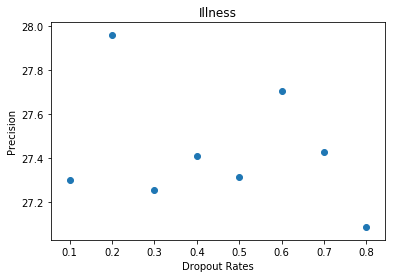

In [58]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*illness_precision))
plt.xlabel("Dropout Rates")
plt.ylabel("Precision")
plt.title("Illness")
plt.show()

In [46]:
illness_recall = []
for x in results:
    y = x[0]
    z = x[1]['ents_r']
    tup = (y,z)
    illness_recall.append(tup)

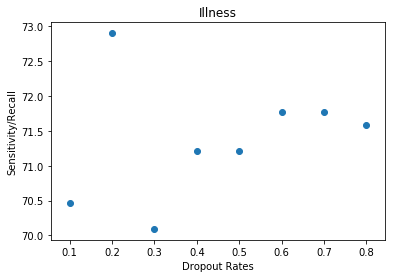

In [57]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*illness_recall))
plt.xlabel("Dropout Rates")
plt.ylabel("Sensitivity/Recall")
plt.title("Illness")
plt.show()

In [48]:
illness_fscore = []
for x in results:
    y = x[0]
    z = x[1]['ents_f']
    tup = (y,z)
    illness_fscore.append(tup)

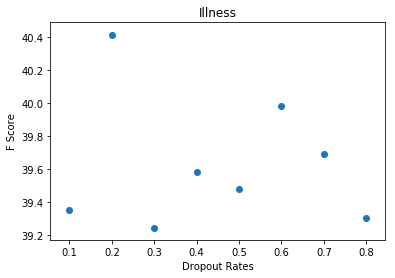

In [56]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*illness_fscore))
plt.xlabel("Dropout Rates")
plt.ylabel("F Score")
plt.title("Illness")
plt.show()

In [59]:
symptom_precision = []
for x in results:
    y = x[0]
    z = x[2]['ents_p']
    tup = (y,z)
    symptom_precision.append(tup)

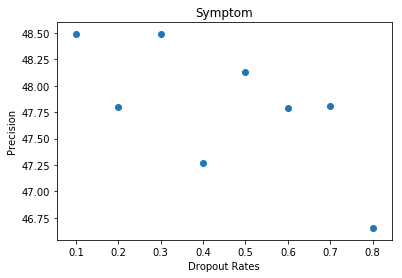

In [60]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*symptom_precision))
plt.xlabel("Dropout Rates")
plt.ylabel("Precision")
plt.title("Symptom")
plt.show()

In [61]:
symptom_recall = []
for x in results:
    y = x[0]
    z = x[2]['ents_r']
    tup = (y,z)
    symptom_recall.append(tup)

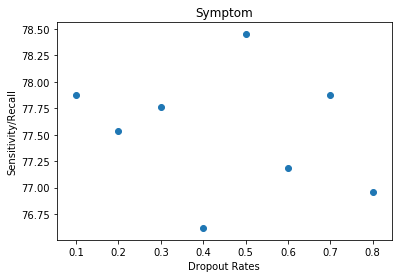

In [62]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*symptom_recall))
plt.xlabel("Dropout Rates")
plt.ylabel("Sensitivity/Recall")
plt.title("Symptom")
plt.show()

In [63]:
symptom_fscore = []
for x in results:
    y = x[0]
    z = x[2]['ents_f']
    tup = (y,z)
    symptom_fscore.append(tup)

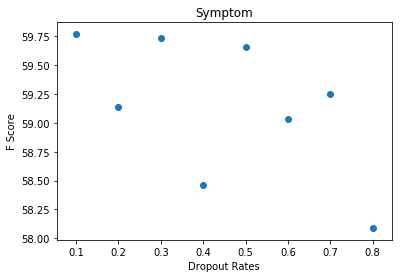

In [64]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*symptom_fscore))
plt.xlabel("Dropout Rates")
plt.ylabel("F Score")
plt.title("Symptom")
plt.show()

In [65]:
age_precision = []
for x in results:
    y = x[0]
    z = x[3]['ents_p']
    tup = (y,z)
    age_precision.append(tup)

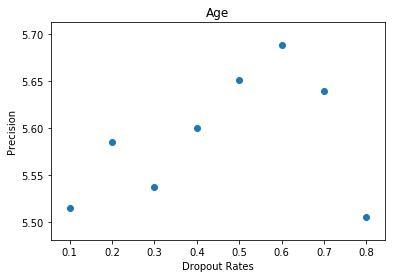

In [66]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*age_precision))
plt.xlabel("Dropout Rates")
plt.ylabel("Precision")
plt.title("Age")
plt.show()

In [67]:
age_recall = []
for x in results:
    y = x[0]
    z = x[3]['ents_r']
    tup = (y,z)
    age_recall.append(tup)

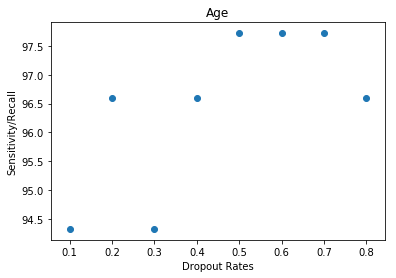

In [68]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*age_recall))
plt.xlabel("Dropout Rates")
plt.ylabel("Sensitivity/Recall")
plt.title("Age")
plt.show()

In [69]:
age_fscore = []
for x in results:
    y = x[0]
    z = x[3]['ents_f']
    tup = (y,z)
    age_fscore.append(tup)

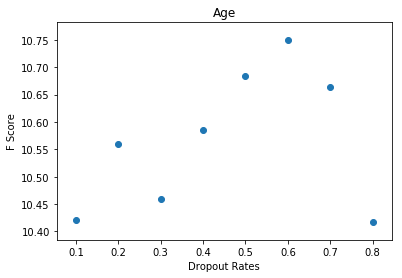

In [70]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*age_fscore))
plt.xlabel("Dropout Rates")
plt.ylabel("F Score")
plt.title("Age")
plt.show()

In [71]:
gender_precision = []
for x in results:
    y = x[0]
    z = x[4]['ents_p']
    tup = (y,z)
    gender_precision.append(tup)

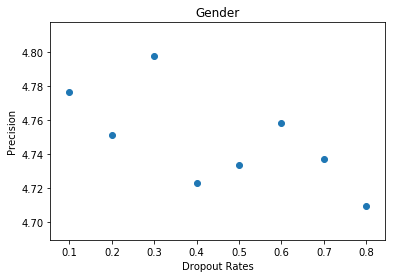

In [72]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*gender_precision))
plt.xlabel("Dropout Rates")
plt.ylabel("Precision")
plt.title("Gender")
plt.show()

In [73]:
gender_recall = []
for x in results:
    y = x[0]
    z = x[4]['ents_r']
    tup = (y,z)
    gender_recall.append(tup)

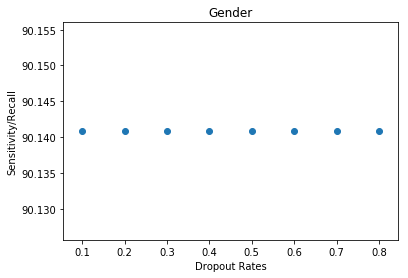

In [74]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*gender_recall))
plt.xlabel("Dropout Rates")
plt.ylabel("Sensitivity/Recall")
plt.title("Gender")
plt.show()

In [75]:
gender_fscore = []
for x in results:
    y = x[0]
    z = x[4]['ents_f']
    tup = (y,z)
    gender_fscore.append(tup)

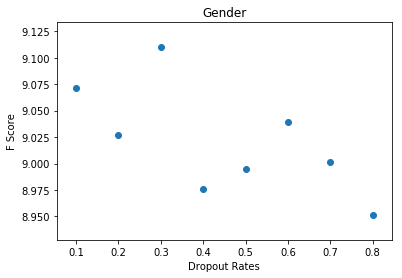

In [76]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*gender_fscore))
plt.xlabel("Dropout Rates")
plt.ylabel("F Score")
plt.title("Gender")
plt.show()

In [77]:
all_corpus = []

In [78]:
for x in xml_list:
    convert("Doc"+str(x)+".xml") # convert xml file to json format
    with open('data.json') as f:
        data = json.load(f) ## load newly created json file
        text = data['GateDocument']['TextWithNodes']['#text'] ## select only text portion
        listofDicts = data['GateDocument']['AnnotationSet']['Annotation'] ## select only annotation portion
        annot = [] ## Create empty list
        entity = {} ## Create empty dictionary
        for x in listofDicts:
            e = int(x['@EndNode'])
            s = int(x['@StartNode'])
            t = x['@Type']
            val = (s,e,t)
            annot.append(val) ## Populate list for each annotation set & re - arrange values
            entity['entities'] = annot
            tr = (text,entity) ## Create tuple for this document
    all_corpus.append(tr) ## Append tuple to original list

In [80]:
#all_corpus

#### Running the model with most optimal drop rate using entire annotated corpus

In [81]:
nlp = spacy.blank('en')
gender_pattern = [
    {"LIKE_NUM": True},
    {"LOWER": {"IN": ["male", "female", "Mr", "Mrs", "lady", "gentleman", "woman", "man", "Ms", " F "," M "]}}
]
age_pattern = [
    {"LIKE_NUM": True},
    {"LOWER": {"IN": ["-year-old", "year old", "yo", "year-old", "y&apos;o", "YO", "y.o", "y/o", "y.o."]}}
]
patterns = [{"label": "Gender", "pattern": gender_pattern},{"label": "Age", "pattern": age_pattern}]
ruler = EntityRuler(nlp, patterns=patterns)
# create the built-in pipeline components and add them to the pipeline
# nlp.create_pipe works for built-ins that are registered with spaCy
if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner',config={"architecture":"simple_cnn"})
    nlp.add_pipe(ner, last=True)
    nlp.add_pipe(ruler, before="ner")
# otherwise, get it so we can add labels
else:
    ner = nlp.get_pipe('ner')
    nlp.add_pipe(ruler, before="ner")
# add labels
for _, annotations in all_corpus:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])
# get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
with open ("C:/Users/ray/pretrained_model2000/model1999.bin","rb") as file_:
    ner.model.tok2vec.from_bytes(file_.read())
ls_losses = []
for itn in range(800):
    random.shuffle(all_corpus)
    losses = {}
    batches = minibatch(all_corpus,size=compounding(4.0,32.0,1.001))
    for batch in batches:
        text,annotations = zip(*batch)
        nlp.update(
            text,  # batch of texts
            annotations,  # batch of annotations
            drop=0.2,  # optimal dropout rate
            sgd=optimizer,  # callable to update weights
            losses=losses,
        )
    ls_losses.append(losses.get('ner'))
    print(losses)

{'ner': 14922.062835056886}
{'ner': 4868.8715240615375}
{'ner': 3704.9197070674863}
{'ner': 3110.7156941439325}
{'ner': 3036.2577789902643}
{'ner': 2658.0155779488673}
{'ner': 2517.7276207516675}
{'ner': 2137.721583647677}
{'ner': 1957.5649365829147}
{'ner': 1687.3579018856217}
{'ner': 1717.9203327946188}
{'ner': 1575.1280307657807}
{'ner': 1607.090689179004}
{'ner': 1478.8694914313228}
{'ner': 1314.907595324732}
{'ner': 1305.5769246434654}
{'ner': 1297.8887794984832}
{'ner': 1162.8782760500685}
{'ner': 1149.9725767288626}
{'ner': 1096.0649145372386}
{'ner': 959.9003566206461}
{'ner': 1008.3530237413222}
{'ner': 1001.6113629109306}
{'ner': 1047.6737782808652}
{'ner': 906.6897192503268}
{'ner': 854.3916652148154}
{'ner': 922.7515829382132}
{'ner': 718.8734656678879}
{'ner': 818.3156284445313}
{'ner': 723.9166713356503}
{'ner': 645.2178786519528}
{'ner': 705.0265873904574}
{'ner': 619.8805740975754}
{'ner': 694.211320761918}
{'ner': 640.5003509523681}
{'ner': 702.1190350932549}
{'ner': 6

{'ner': 93.76184189142117}
{'ner': 87.06520169839084}
{'ner': 126.05790115063647}
{'ner': 115.53988584301032}
{'ner': 85.26653891222449}
{'ner': 104.54176856692024}
{'ner': 113.04419523562653}
{'ner': 132.85619836183682}
{'ner': 108.34189406941842}
{'ner': 73.54926084747603}
{'ner': 102.94023008768391}
{'ner': 68.30778698204864}
{'ner': 120.62229848875502}
{'ner': 104.82227684510411}
{'ner': 77.55181724540978}
{'ner': 110.87410649929998}
{'ner': 98.01754567660394}
{'ner': 126.25084439654907}
{'ner': 97.49499547262297}
{'ner': 136.60727880416874}
{'ner': 76.18090952863996}
{'ner': 77.53120120146329}
{'ner': 86.34420164899525}
{'ner': 80.43811485355027}
{'ner': 95.32405572701052}
{'ner': 86.3123989440924}
{'ner': 73.74334225934551}
{'ner': 80.38608763780947}
{'ner': 129.82151353218288}
{'ner': 172.00210291767758}
{'ner': 153.24317589408307}
{'ner': 78.4986795974286}
{'ner': 96.79608869015959}
{'ner': 129.50156849899037}
{'ner': 142.9221723360437}
{'ner': 138.1434131784001}
{'ner': 104.01

{'ner': 79.52540995918184}
{'ner': 39.58449418723508}
{'ner': 52.691311129788076}
{'ner': 44.89006703639185}
{'ner': 45.44976603905585}
{'ner': 46.09122361135749}
{'ner': 51.29064245376377}
{'ner': 43.26007547885761}
{'ner': 49.05280746402217}
{'ner': 35.79998174558312}
{'ner': 50.93771750548467}
{'ner': 56.556101764909144}
{'ner': 28.557907200924493}
{'ner': 44.552061304695144}
{'ner': 47.613557785344916}
{'ner': 65.68973501118273}
{'ner': 50.34958997428185}
{'ner': 37.618189942288964}
{'ner': 45.14740713654807}
{'ner': 40.85220743994716}
{'ner': 66.85460937629603}
{'ner': 33.96287841834375}
{'ner': 49.636234014251364}
{'ner': 71.46049934953429}
{'ner': 44.75519397803246}
{'ner': 71.28975523962745}
{'ner': 61.8621353170527}
{'ner': 93.56251712447032}
{'ner': 81.72263601160367}
{'ner': 79.7089758520808}
{'ner': 50.99816423106324}
{'ner': 57.84021427178022}
{'ner': 56.267426796770195}
{'ner': 51.095838821415526}
{'ner': 55.7580653208892}
{'ner': 72.10942385957604}
{'ner': 33.70890393323

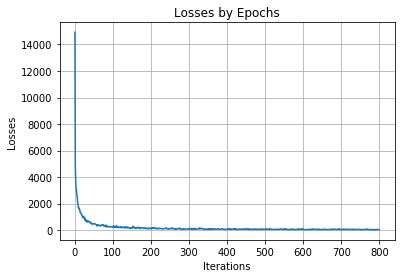

In [82]:
s = list(range(1, 801))
plot(s,ls_losses)
 
xlabel('Iterations')
ylabel('Losses')
title('Losses by Epochs')
grid(True)
show()

#### Running model on unseen data

In [83]:
with open('Test.txt') as f:
    read_data = f.read()
    f.closed

In [84]:
read_data

'The patient is a 62-year-old\nfemale with a past medical history of significant obesity ,\ndiabetes , hypertension , hypercholesterolemia , heart failure ,\npulmonary fibrosis , on home O2 who presented with shortness of\nbreath , and left jaw pain on 8/10/2003 .  She had been in her\nusual state of health until approximately 6 p.m. on the day of\nadmission , when at that time , she suddenly became short of\nbreath. She reports that she then sat down in her wheelchair and\n&quot;passed out.&quot; However , it is unclear if the patient actually\nlost consciousness. The patient also developed jaw pain\nradiating to her back while EMTs were present and also complained\nof a tug in her chest. The pain was unrelieved by nitroglycerin ,\noxygen; it was constant in nature. At the time of her arrival in\nthe emergency room , the patient was hemodynamically stable with\nan O2 sat of 99% on room air. She was given sublingual nitrate\nwith no effect. Because of her history of coronary artery\ndi

In [85]:
doc = nlp(read_data)
print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities [('62-year-old', 'Age'), ('female', 'Gender'), ('obesity', 'Illness'), ('diabetes', 'Illness'), ('hypertension', 'Illness'), ('hypercholesterolemia', 'Illness'), ('heart failure', 'Illness'), ('pulmonary fibrosis', 'Illness'), ('shortness of\nbreath', 'Symptom'), ('jaw pain', 'Symptom'), ('short of\nbreath', 'Symptom'), ('lost consciousness', 'Symptom'), ('jaw pain', 'Symptom'), ('radiating', 'Symptom'), ('pain', 'Symptom'), ('coronary artery\ndisease', 'Illness')]
Tokens [('The', '', 2), ('patient', '', 2), ('is', '', 2), ('a', '', 2), ('62-year', 'Age', 3), ('-', 'Age', 1), ('old', 'Age', 1), ('\n', '', 2), ('female', 'Gender', 3), ('with', '', 2), ('a', '', 2), ('past', '', 2), ('medical', '', 2), ('history', '', 2), ('of', '', 2), ('significant', '', 2), ('obesity', 'Illness', 3), (',', '', 2), ('\n', '', 2), ('diabetes', 'Illness', 3), (',', '', 2), ('hypertension', 'Illness', 3), (',', '', 2), ('hypercholesterolemia', 'Illness', 3), (',', '', 2), ('heart', 'Illness', 3),